# Atividade Spark SQL e Visualização

Considerando o dataset detalhado a seguir, extraia o conjunto de informações solicitadas.

### Dataset dados de COVID no Brasil

- Dados relativos a pacientes que realizaram exames de Covid19 no Brasil
- ~1.6GB
- 4.4M de instâncias


|  # | Nome do campo        	| Descrição                                     	|
|----|----------------------	|-----------------------------------------------	|
|  0 | id                   	| identificador                                 	|
|  1 | dataNotificacao      	| Data da notificação                           	|
|  2 | dataInicioSintomas   	| Data do inicio dos sintomas                   	|
|  3 | dataNascimento       	| Data de nascimento                            	|
|  4 | sintomas             	| Sintomas do paciente                          	|
|  5 | profissionalSaude    	| Relacionado a profissional de saúde           	|
|  6 | cbo                  	| Ocupação                                      	|
|  7 | condicoes            	| Condições do paciente                         	|
|  8 | estadoTeste          	| Estado do teste                               	|
|  9 | dataTeste            	| Data do teste                                 	|
| 10 | tipoTeste            	| Tipo de teste realizado                       	|
| 11 | resultadoTeste       	| Resultado do Teste                            	|
| 12 | paisOrigem           	| Pais de Origem do paciente                    	|
| 13 | sexo                 	| Sexo do paciente                              	|
| 14 | bairro               	| Bairro do paciente                            	|
| 15 | estado               	| Estado do paciente                            	|
| 16 | estadoIBGE              	| Estado do paciente IBGE                          	|
| 17 | municipio            	| Municipio do paciente                         	|
| 18 | municipioIBGE          	| Municipio do paciente                         	|
| 19 | cep            	        | CEP                                            	|
| 20 | origem               	| Origem do paciente                            	|
| 21 | cnes                 	| Código da unidade de saúde                    	|
| 22 | estadoNotificacao    	| Estado da notificação                         	|
| 23 | estadoNotificacaoIBGE    | Estado da notificação IBGE                      	|
| 24 | municipioNotificacao 	| Município da notificação                      	|
| 25 | municipioNotificacaoIBGE | Município da notificação IBGE                    	|
| 26 | numeroNotificacao    	| Número da notificação                         	|
| 27 | excluido             	| ID de exclusão                                	|
| 28 | validado             	| Local validação                               	|
| 29 | idade                	| Idade do paciente                             	|
| 30 | dataEncerramento     	| Data do encerramento da avaliação do paciente 	|
| 31 | evolucaoCaso         	| Evolução do caso do paciente                  	|
| 32 | classificacaoFinal   	| Avaliação final do caso                       	|

Informações a serem extraídas:

1. Gráfico exibindo os 10 sintomas mais comuns para casos positivos para corona virus
2. Gráfico da quantidade de pacientes com exames realizados ao longo do tempo
3. Gráfico da quantidade de pacientes positivos para corona virus (resultadoTeste) no PARANÁ
4. Gráfico da quantidade de pacientes positivos para corona virus (resultadoTeste) em Curitiba
5. Gráfico da quantidade de pacientes de Curitiba de acordo com o bairro
6. Gráfico comparando quantidade de pacientes positivos para corona virus (resultadoTeste) no PARANÁ e SANTA CATARINA ao longo dos dias
7. Gráfico comparando quantidade de pacientes que vieram a óbito (evolucaoCaso) no PARANÁ e SANTA CATARINA ao longo dos dias
8. Gráfico comparando os 10 sintomas mais comuns entre casos positivos e não positivos para corona virus
9. Gráfico comparando as idades das pessoas que realizaram exames no PARANÁ e em SANTA CATARINA
10. Gráfico comparando as idades das pessoas que realizaram exames no PARANÁ de acordo com o sexo
11. Gráfico comparando as idades das pessoas que realizaram exames no PARANÁ de acordo com a evolução do caso

In [3]:
#instala pyspark no google colab
!pip install pyspark==3.3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 5.8 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845494 sha256=dfa1e53fe52930e1a1a8856dd22e7412f70e19249b0d73a4ddcc020a17ea4fb8
  Stored in directory: /root/.cache/pip/wheels/0f/f0/3d/517368b8ce80486e84f89f214e0a022554e4ee64969f46279b
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [4]:
# abre sessão no spark sql
from pyspark.sql import SparkSession
import pyspark.sql.functions as func
import matplotlib.pyplot as plt

sc = SparkSession \
    .builder \
    .master('local[*]') \
    .getOrCreate()

In [5]:
#Efetua download do arquivo covid
!gdown 1EYMih3Ys1-DmaIZ9n0Sl5KAcRGqtpuj9

Downloading...
From: https://drive.google.com/uc?id=1EYMih3Ys1-DmaIZ9n0Sl5KAcRGqtpuj9
To: /content/covid.csv
100% 1.64G/1.64G [00:15<00:00, 103MB/s] 


In [15]:
df = sc.read \
    .option('delimiter', ';') \
    .option('header', 'true') \
    .option('inferschema', 'true') \
    .csv('file:////content/covid.csv')

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: ignored

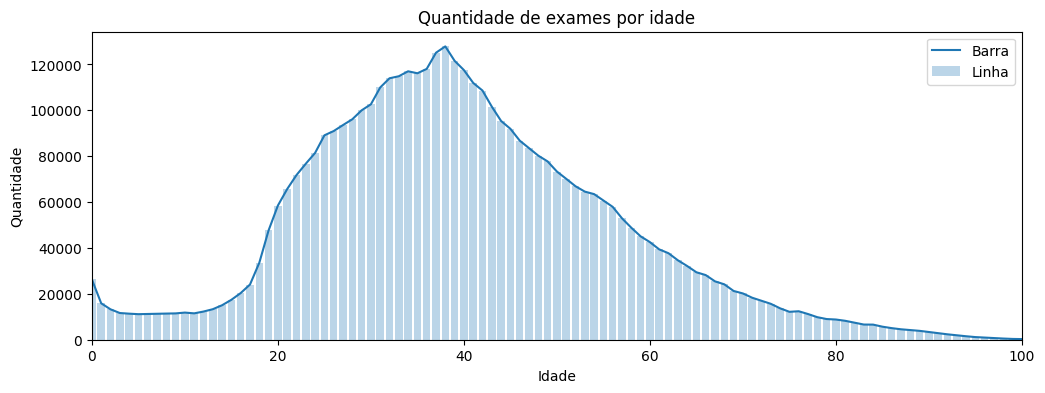

In [7]:

resultado = df.select('idade')\
  .groupBy('idade')\
  .agg(func.count('*').alias('qt'))\
  .orderBy('idade')\
  .collect()
listaIdade = [x['idade'] for x in resultado]
listaQt = [x['qt'] for x in resultado]

import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.bar(listaIdade, listaQt, alpha=0.3)
plt.plot(listaIdade, listaQt)
plt.legend(['Barra', 'Linha'])
plt.ylabel('Quantidade')
plt.xlabel('Idade')
plt.title('Quantidade de exames por idade')
plt.xlim([0,100])
plt.show()

In [ ]:
#informacao 1 - Gráfico exibindo os 10 sintomas mais comuns para casos positivos para corona virus
from pyspark.sql import SparkSession
import pyspark.sql.functions as func
import matplotlib.pyplot as plt

df = sc.read \
    .option('delimiter', ';') \
    .option('header', 'true') \
    .option('inferschema', 'true') \
    .csv('file:////content/covid.csv')


df = df.select('sintomas') \
    .withColumn('sintoma', func.explode(func.split('sintomas', ','))) \
    .groupBy('sintoma') \
    .agg(func.count('*').alias('qt')) \
    .orderBy(func.desc('qt'))


top_10_symptoms = df.limit(10).collect()


symptoms = [x['sintoma'] for x in top_10_symptoms]
counts = [x['qt'] for x in top_10_symptoms]


plt.figure(figsize=(12, 6))
plt.bar(symptoms, counts, alpha=0.7, color='blue')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Symptoms for COVID-19 Cases')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

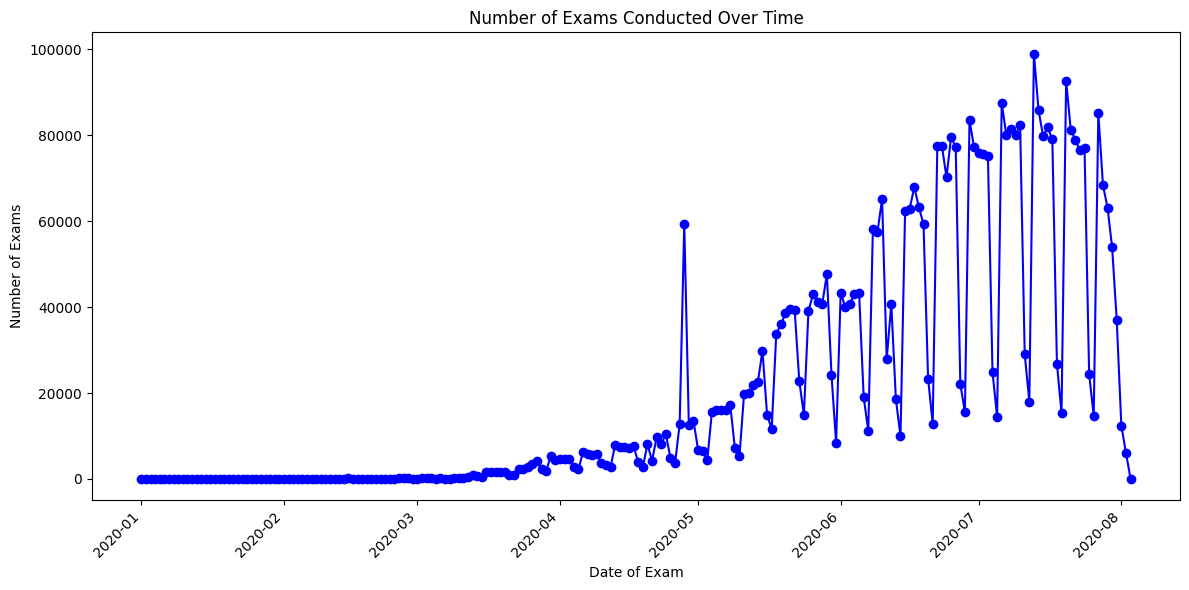

In [14]:

#informacao 2 - Gráfico da quantidade de pacientes com exames realizados ao longo do tempo
from pyspark.sql import SparkSession
import pyspark.sql.functions as func
import matplotlib.pyplot as plt

df = sc.read \
    .option('delimiter', ';') \
    .option('header', 'true') \
    .option('inferschema', 'true') \
    .csv('file:////content/covid.csv')

df = df.withColumn('dataTeste', func.to_date('dataTeste'))  # Convert to date type


exam_counts = df.groupBy('dataTeste') \
    .agg(func.count('*').alias('qt')) \
    .orderBy('dataTeste') \
    .collect()


dates = [row['dataTeste'] for row in exam_counts]
exam_quantities = [row['qt'] for row in exam_counts]


plt.figure(figsize=(12, 6))
plt.plot(dates, exam_quantities, marker='o', linestyle='-', color='b')
plt.xlabel('Date of Exam')
plt.ylabel('Number of Exams')
plt.title('Number of Exams Conducted Over Time')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

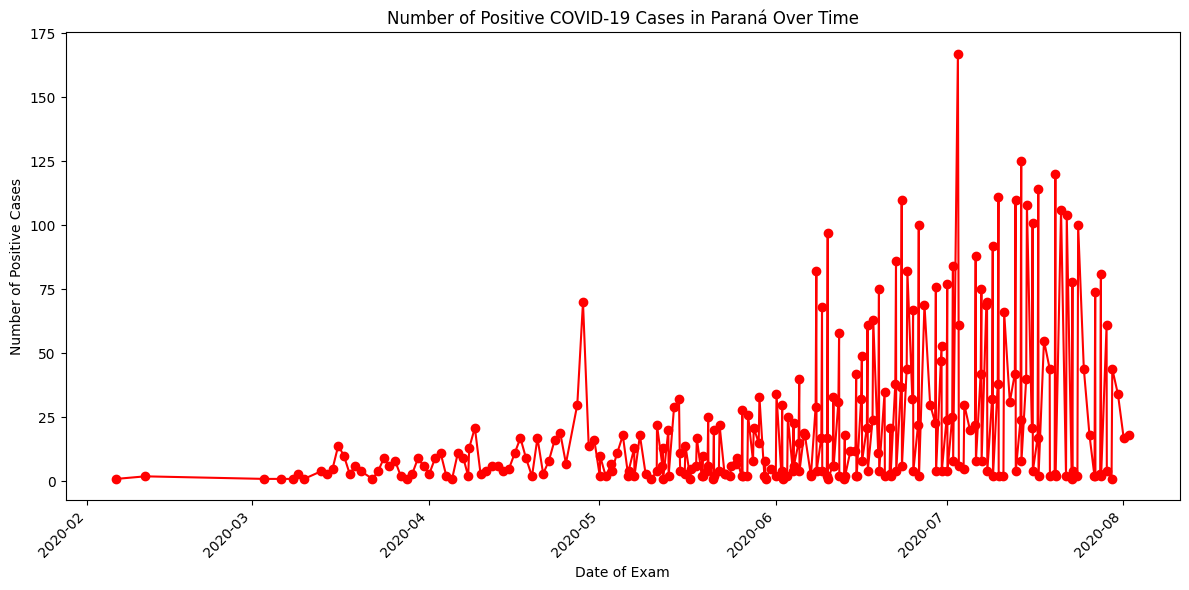

In [18]:
#informacao 3 - Gráfico da quantidade de pacientes positivos para corona virus (resultadoTeste) no PARANÁ
from pyspark.sql import SparkSession
import pyspark.sql.functions as func
import matplotlib.pyplot as plt

df = sc.read \
    .option('delimiter', ';') \
    .option('header', 'true') \
    .option('inferschema', 'true') \
    .csv('file:////content/covid.csv')


df_parana_positive = df.filter((func.col('resultadoTeste') == 'Positivo') & (func.col('estado') == 'PARANÁ'))


positive_counts = df_parana_positive.groupBy('dataTeste') \
    .agg(func.count('*').alias('qt')) \
    .orderBy('dataTeste') \
    .collect()


dates_positive = [row['dataTeste'] for row in positive_counts]
positive_quantities = [row['qt'] for row in positive_counts]

plt.figure(figsize=(12, 6))
plt.plot(dates_positive, positive_quantities, marker='o', linestyle='-', color='r')
plt.xlabel('Date of Exam')
plt.ylabel('Number of Positive Cases')
plt.title('Number of Positive COVID-19 Cases in Paraná Over Time')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

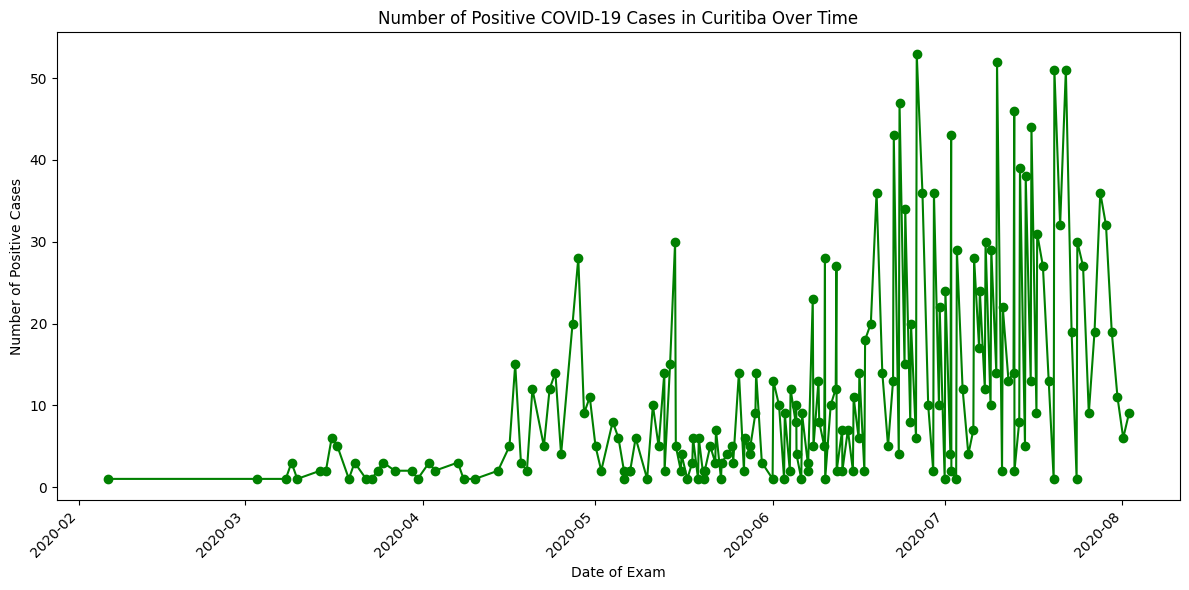

In [19]:
#informacao 4 - Gráfico da quantidade de pacientes positivos para corona virus (resultadoTeste) em Curitiba
from pyspark.sql import SparkSession
import pyspark.sql.functions as func
import matplotlib.pyplot as plt

df = sc.read \
    .option('delimiter', ';') \
    .option('header', 'true') \
    .option('inferschema', 'true') \
    .csv('file:////content/covid.csv')

df_curitiba_positive = df.filter((func.col('resultadoTeste') == 'Positivo') & (func.col('municipio') == 'Curitiba'))

positive_counts_curitiba = df_curitiba_positive.groupBy('dataTeste') \
    .agg(func.count('*').alias('qt')) \
    .orderBy('dataTeste') \
    .collect()


dates_positive_curitiba = [row['dataTeste'] for row in positive_counts_curitiba]
positive_quantities_curitiba = [row['qt'] for row in positive_counts_curitiba]


plt.figure(figsize=(12, 6))
plt.plot(dates_positive_curitiba, positive_quantities_curitiba, marker='o', linestyle='-', color='g')
plt.xlabel('Date of Exam')
plt.ylabel('Number of Positive Cases')
plt.title('Number of Positive COVID-19 Cases in Curitiba Over Time')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

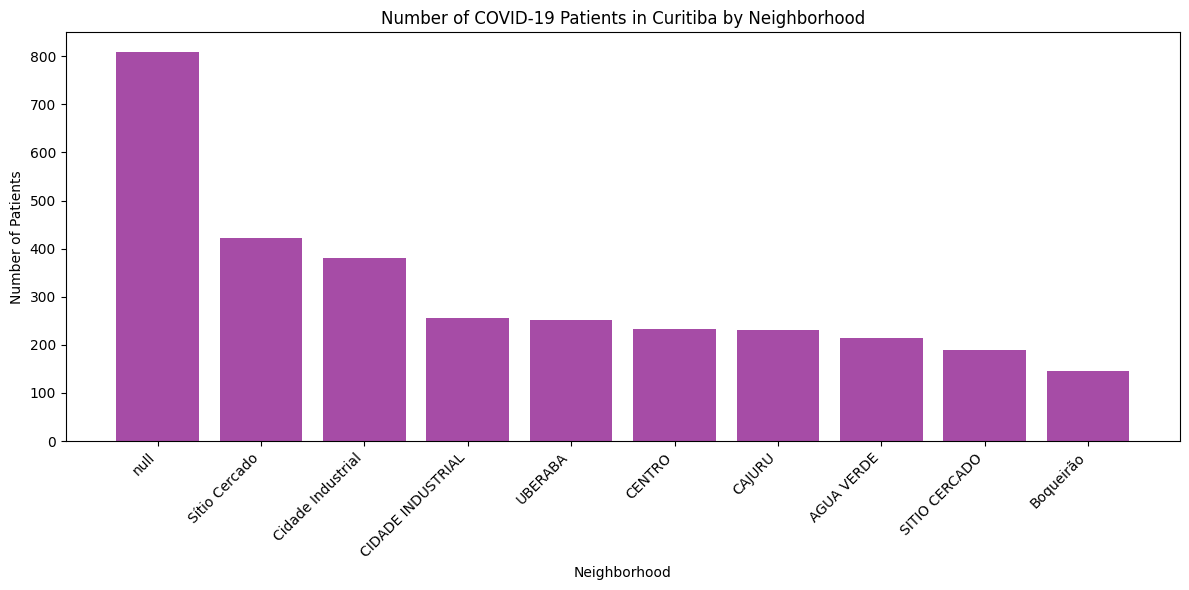

In [20]:
#informacao 5 - Gráfico da quantidade de pacientes de Curitiba de acordo com o bairro
from pyspark.sql import SparkSession
import pyspark.sql.functions as func
import matplotlib.pyplot as plt

df = sc.read \
    .option('delimiter', ';') \
    .option('header', 'true') \
    .option('inferschema', 'true') \
    .csv('file:////content/covid.csv')


df_curitiba = df.filter(func.col('municipio') == 'Curitiba')


neighborhood_counts = df_curitiba.groupBy('bairro') \
    .agg(func.count('*').alias('qt')) \
    .orderBy(func.desc('qt')) \
    .limit(10)


neighborhoods = [row['bairro'] for row in neighborhood_counts.collect()]
patient_quantities = [row['qt'] for row in neighborhood_counts.collect()]

plt.figure(figsize=(12, 6))
plt.bar(neighborhoods, patient_quantities, alpha=0.7, color='purple')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Patients')
plt.title('Number of COVID-19 Patients in Curitiba by Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

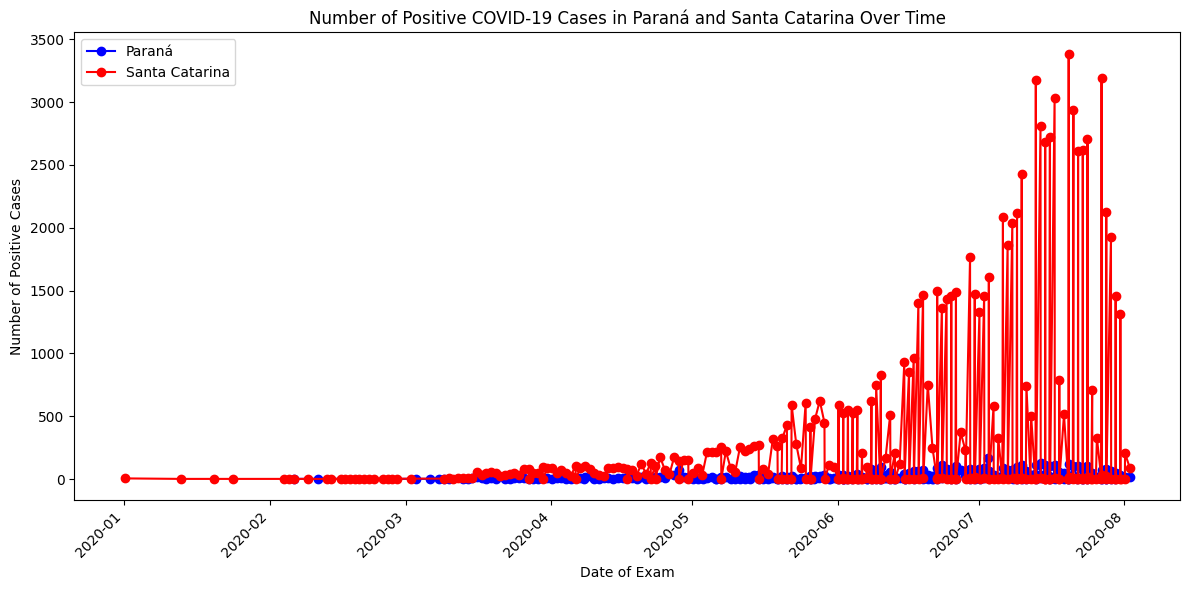

In [21]:
#informacao 6 - Gráfico comparando quantidade de pacientes positivos para corona virus (resultadoTeste) no PARANÁ e SANTA CATARINA ao longo dos dias
from pyspark.sql import SparkSession
import pyspark.sql.functions as func
import matplotlib.pyplot as plt

df = sc.read \
    .option('delimiter', ';') \
    .option('header', 'true') \
    .option('inferschema', 'true') \
    .csv('file:////content/covid.csv')

df_states_positive = df.filter(func.col('resultadoTeste') == 'Positivo') \
    .groupBy('estado', 'dataTeste') \
    .agg(func.count('*').alias('qt')) \
    .orderBy('dataTeste')


df_parana_positive = df_states_positive.filter(func.col('estado') == 'PARANÁ').collect()
df_santa_catarina_positive = df_states_positive.filter(func.col('estado') == 'SANTA CATARINA').collect()


dates_parana = [row['dataTeste'] for row in df_parana_positive]
positive_quantities_parana = [row['qt'] for row in df_parana_positive]

dates_santa_catarina = [row['dataTeste'] for row in df_santa_catarina_positive]
positive_quantities_santa_catarina = [row['qt'] for row in df_santa_catarina_positive]

plt.figure(figsize=(12, 6))
plt.plot(dates_parana, positive_quantities_parana, marker='o', linestyle='-', color='b', label='Paraná')
plt.plot(dates_santa_catarina, positive_quantities_santa_catarina, marker='o', linestyle='-', color='r', label='Santa Catarina')
plt.xlabel('Date of Exam')
plt.ylabel('Number of Positive Cases')
plt.title('Number of Positive COVID-19 Cases in Paraná and Santa Catarina Over Time')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()

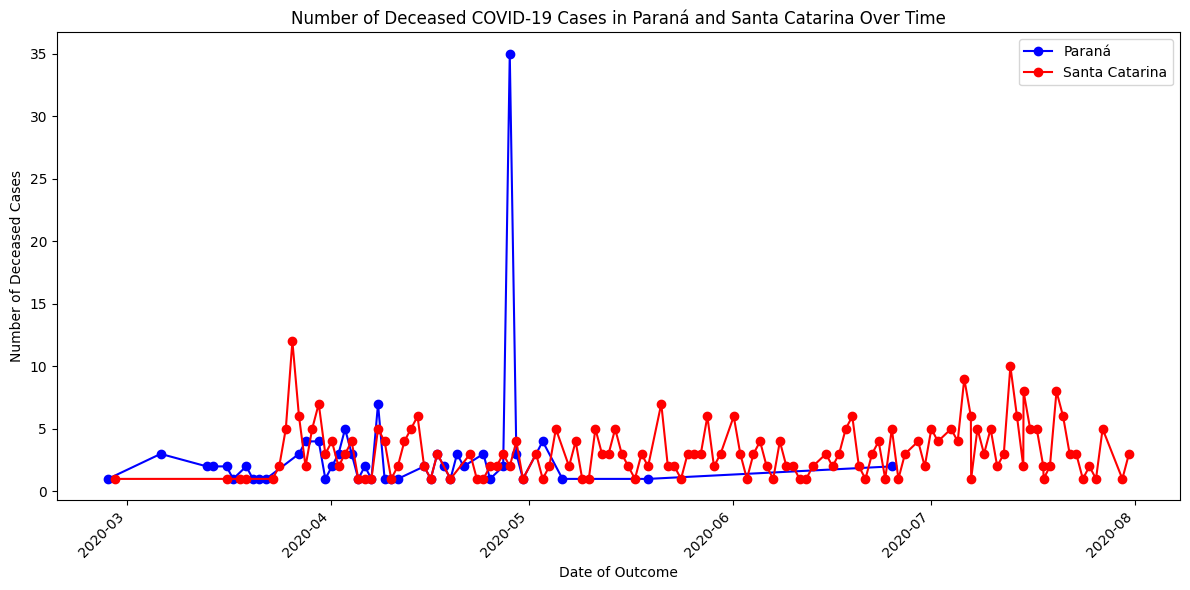

In [22]:
#informacao 7 - Gráfico comparando quantidade de pacientes que vieram a óbito (evolucaoCaso) no PARANÁ e SANTA CATARINA ao longo dos dias
from pyspark.sql import SparkSession
import pyspark.sql.functions as func
import matplotlib.pyplot as plt

df = sc.read \
    .option('delimiter', ';') \
    .option('header', 'true') \
    .option('inferschema', 'true') \
    .csv('file:////content/covid.csv')

df_states_deceased = df.filter(func.col('evolucaoCaso') == 'Óbito') \
    .groupBy('estado', 'dataTeste') \
    .agg(func.count('*').alias('qt')) \
    .orderBy('dataTeste')


df_parana_deceased = df_states_deceased.filter(func.col('estado') == 'PARANÁ').collect()
df_santa_catarina_deceased = df_states_deceased.filter(func.col('estado') == 'SANTA CATARINA').collect()


dates_parana = [row['dataTeste'] for row in df_parana_deceased]
deceased_quantities_parana = [row['qt'] for row in df_parana_deceased]

dates_santa_catarina = [row['dataTeste'] for row in df_santa_catarina_deceased]
deceased_quantities_santa_catarina = [row['qt'] for row in df_santa_catarina_deceased]


plt.figure(figsize=(12, 6))
plt.plot(dates_parana, deceased_quantities_parana, marker='o', linestyle='-', color='b', label='Paraná')
plt.plot(dates_santa_catarina, deceased_quantities_santa_catarina, marker='o', linestyle='-', color='r', label='Santa Catarina')
plt.xlabel('Date of Outcome')
plt.ylabel('Number of Deceased Cases')
plt.title('Number of Deceased COVID-19 Cases in Paraná and Santa Catarina Over Time')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()

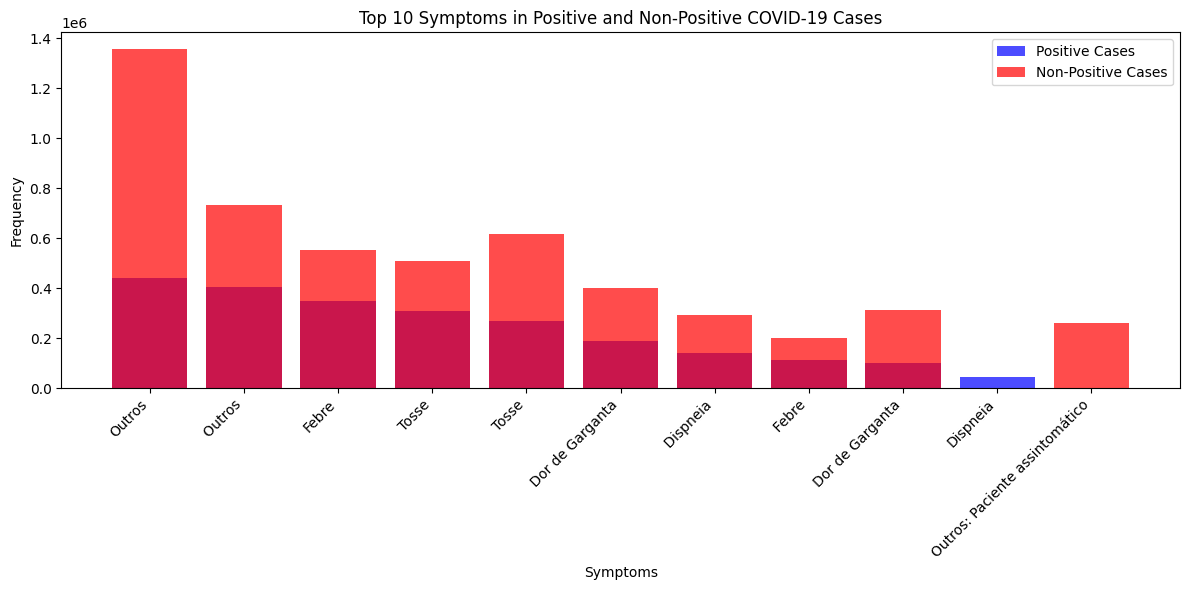

In [23]:
#informacao 8 - Gráfico comparando os 10 sintomas mais comuns entre casos positivos e não positivos para corona virus

from pyspark.sql import SparkSession
import pyspark.sql.functions as func
import matplotlib.pyplot as plt

df = sc.read \
    .option('delimiter', ';') \
    .option('header', 'true') \
    .option('inferschema', 'true') \
    .csv('file:////content/covid.csv')

df_positive = df.filter(func.col('resultadoTeste') == 'Positivo')
df_non_positive = df.filter(func.col('resultadoTeste') != 'Positivo')


def count_symptoms(df):
    return df.select('sintomas') \
        .withColumn('sintoma', func.explode(func.split('sintomas', ','))) \
        .groupBy('sintoma') \
        .agg(func.count('*').alias('qt')) \
        .orderBy(func.desc('qt')) \
        .limit(10) \
        .collect()


top_10_positive_symptoms = count_symptoms(df_positive)
top_10_non_positive_symptoms = count_symptoms(df_non_positive)

positive_symptoms = [row['sintoma'] for row in top_10_positive_symptoms]
positive_counts = [row['qt'] for row in top_10_positive_symptoms]

non_positive_symptoms = [row['sintoma'] for row in top_10_non_positive_symptoms]
non_positive_counts = [row['qt'] for row in top_10_non_positive_symptoms]


plt.figure(figsize=(12, 6))
plt.bar(positive_symptoms, positive_counts, alpha=0.7, color='blue', label='Positive Cases')
plt.bar(non_positive_symptoms, non_positive_counts, alpha=0.7, color='red', label='Non-Positive Cases')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')
plt.title('Top 10 Symptoms in Positive and Non-Positive COVID-19 Cases')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()

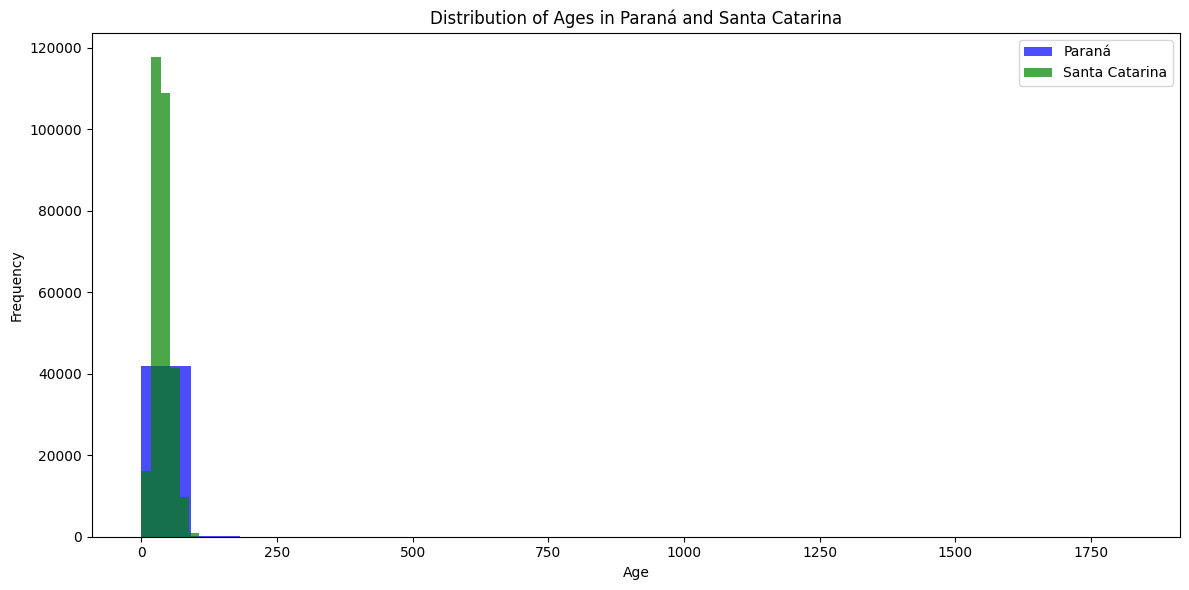

In [24]:
#informacao 9 - Gráfico comparando as idades das pessoas que realizaram exames no PARANÁ e em SANTA CATARINA
from pyspark.sql import SparkSession
import pyspark.sql.functions as func
import matplotlib.pyplot as plt

df = sc.read \
    .option('delimiter', ';') \
    .option('header', 'true') \
    .option('inferschema', 'true') \
    .csv('file:////content/covid.csv')

df_parana = df.filter(func.col('estado') == 'PARANÁ')
df_santa_catarina = df.filter(func.col('estado') == 'SANTA CATARINA')


def collect_ages(df):
    return [row['idade'] for row in df.select('idade').collect()]

ages_parana = collect_ages(df_parana)
ages_santa_catarina = collect_ages(df_santa_catarina)

plt.figure(figsize=(12, 6))
plt.hist(ages_parana, bins=20, alpha=0.7, color='blue', label='Paraná')
plt.hist(ages_santa_catarina, bins=20, alpha=0.7, color='green', label='Santa Catarina')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages in Paraná and Santa Catarina')
plt.legend()
plt.tight_layout()
plt.show()

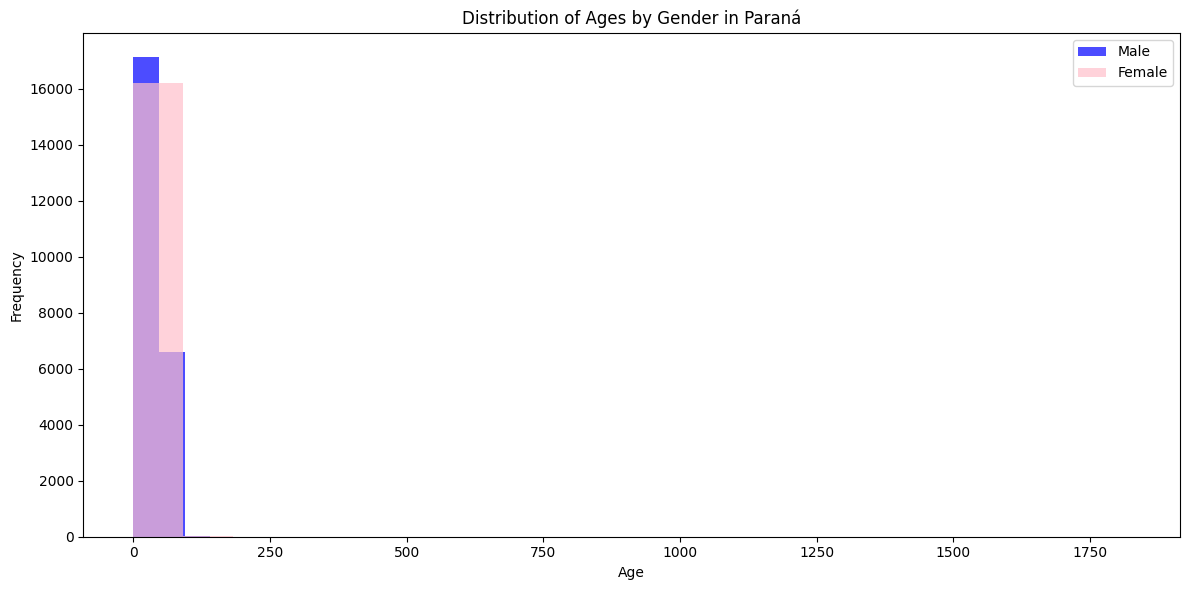

In [27]:
#informacao 10 - Gráfico comparando as idades das pessoas que realizaram exames no PARANÁ de acordo com o sexo
from pyspark.sql import SparkSession
import pyspark.sql.functions as func
import matplotlib.pyplot as plt

df = sc.read \
    .option('delimiter', ';') \
    .option('header', 'true') \
    .option('inferschema', 'true') \
    .csv('file:////content/covid.csv')

df_parana = df.filter(func.col('estado') == 'PARANÁ')


def collect_ages_by_gender(df, gender):
    return [row['idade'] for row in df.filter(func.col('sexo') == gender).select('idade').collect()]

ages_male = collect_ages_by_gender(df_parana, 'Masculino')
ages_female = collect_ages_by_gender(df_parana, 'Feminino')

plt.figure(figsize=(12, 6))
plt.hist(ages_male, bins=20, alpha=0.7, color='blue', label='Male')
plt.hist(ages_female, bins=20, alpha=0.7, color='pink', label='Female')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages by Gender in Paraná')
plt.legend()
plt.tight_layout()
plt.show()

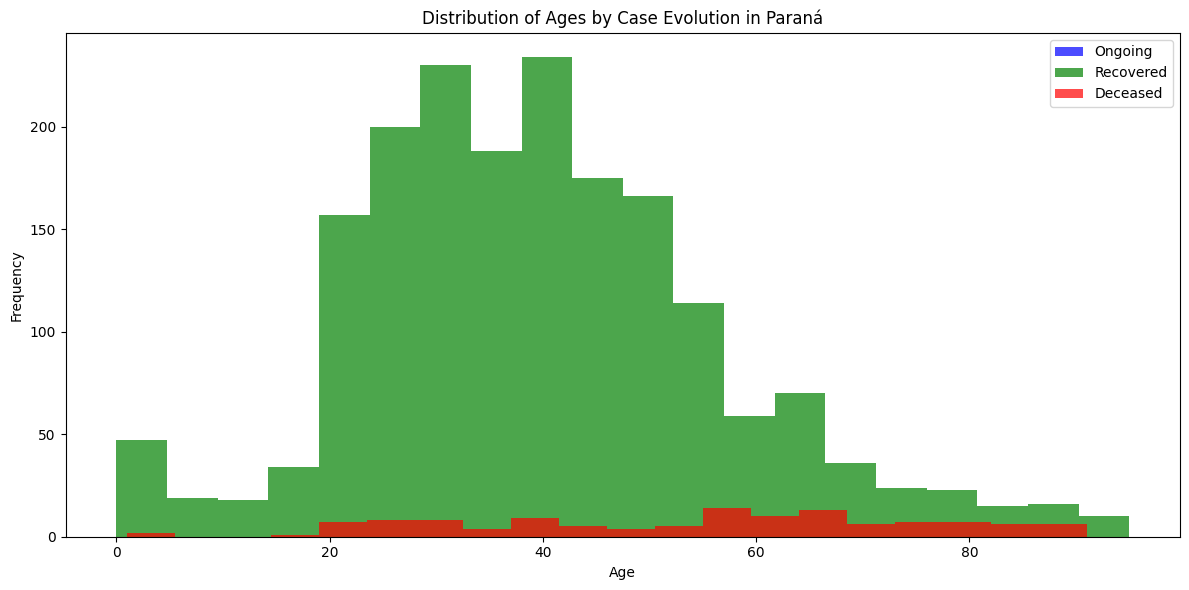

In [26]:
#informacao 11 - Gráfico comparando as idades das pessoas que realizaram exames no PARANÁ de acordo com a evolução do caso
from pyspark.sql import SparkSession
import pyspark.sql.functions as func
import matplotlib.pyplot as plt

df = sc.read \
    .option('delimiter', ';') \
    .option('header', 'true') \
    .option('inferschema', 'true') \
    .csv('file:////content/covid.csv')


df_parana = df.filter(func.col('estado') == 'PARANÁ')

def collect_ages_by_case_evolution(df, case_evolution):
    return [row['idade'] for row in df.filter(func.col('evolucaoCaso') == case_evolution).select('idade').collect()]

ages_ongoing = collect_ages_by_case_evolution(df_parana, 'Em andamento')
ages_recovered = collect_ages_by_case_evolution(df_parana, 'Cura')
ages_deceased = collect_ages_by_case_evolution(df_parana, 'Óbito')

plt.figure(figsize=(12, 6))
plt.hist(ages_ongoing, bins=20, alpha=0.7, color='blue', label='Ongoing')
plt.hist(ages_recovered, bins=20, alpha=0.7, color='green', label='Recovered')
plt.hist(ages_deceased, bins=20, alpha=0.7, color='red', label='Deceased')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages by Case Evolution in Paraná')
plt.legend()
plt.tight_layout()
plt.show()